# <span style="color:DarkOliveGreen">Hurst Exponent Calculation

__Summary:__ <span style="color:Blue">Explore the hurst exponent for various window sizes on given data

In [1]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hurst as hs
import os
np.random.seed(0)

In [5]:
# User defined names
index = "CDX.NA.IG"
filename = "input_data.csv"
date_col = "Date"
hurst_windows = [100, 150, 200, 250, 300, 400]

In [6]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\rsingh\Desktop\World Quant\Capstone\GitHub_main\Notebooks


In [7]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

In [8]:
# Read the data
df = pd.read_csv(filename, index_col=date_col)
df.index = pd.to_datetime(df.index)
df.head()

,IG_BO,SPX,VIX,UST_3M,UST_6M,UST_1Y,UST_2Y,UST_3Y,UST_5Y,UST_7Y,UST_10Y,UST_20Y,UST_30Y,IG_MID
Date,,,,,,,,,,,,,,
2018-01-01,0.574,2673.61,11.04,1.39,1.53,1.76,1.89,1.98,2.20,2.33,2.40,2.58,2.74,49.020
2018-01-02,0.400,2695.81,9.77,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81,48.455
2018-01-03,0.444,2713.06,9.15,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78,47.095
2018-01-04,0.467,2723.99,9.22,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79,45.877
2018-01-05,0.475,2743.15,9.22,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81,45.518


## <span style="color:DarkOliveGreen">Functions

In [9]:
#This uses a ready to use module "hurst"
def Calculate_Hurst(df, var, window_size, ser_type):
    """
    Calculates the hurst exponent for the var:variable in df:dataset for given rolling window size
    ser_type: gives the type of series. It can be of three types:
        'change':      a series is just random values (i.e. np.random.randn(...))
        'random_walk': a series is a cumulative sum of changes (i.e. np.cumsum(np.random.randn(...)))
        'price':       a series is a cumulative product of changes (i.e. np.cumprod(1+epsilon*np.random.randn(...))
    """
    hurst = [np.nan] * (window_size-1)
    
    var_values = list(df[var])
    for i in range(0, len(var_values)-(window_size-1)):
        H, c, data = hs.compute_Hc(var_values[i:i+window_size], kind=ser_type, simplified=True)
        hurst.append(H)
        
    df['hurst_'+str(window_size)] = hurst
   
    return df

## <span style="color:DarkOliveGreen">Hurst Exponent time Plots

In [10]:
# Change to Images directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Images")

In [11]:
# Calculate hurst exponents for given window sizes
for i in range(0, len(hurst_windows)):
    df = Calculate_Hurst(df, 'IG_MID', hurst_windows[i], 'price')

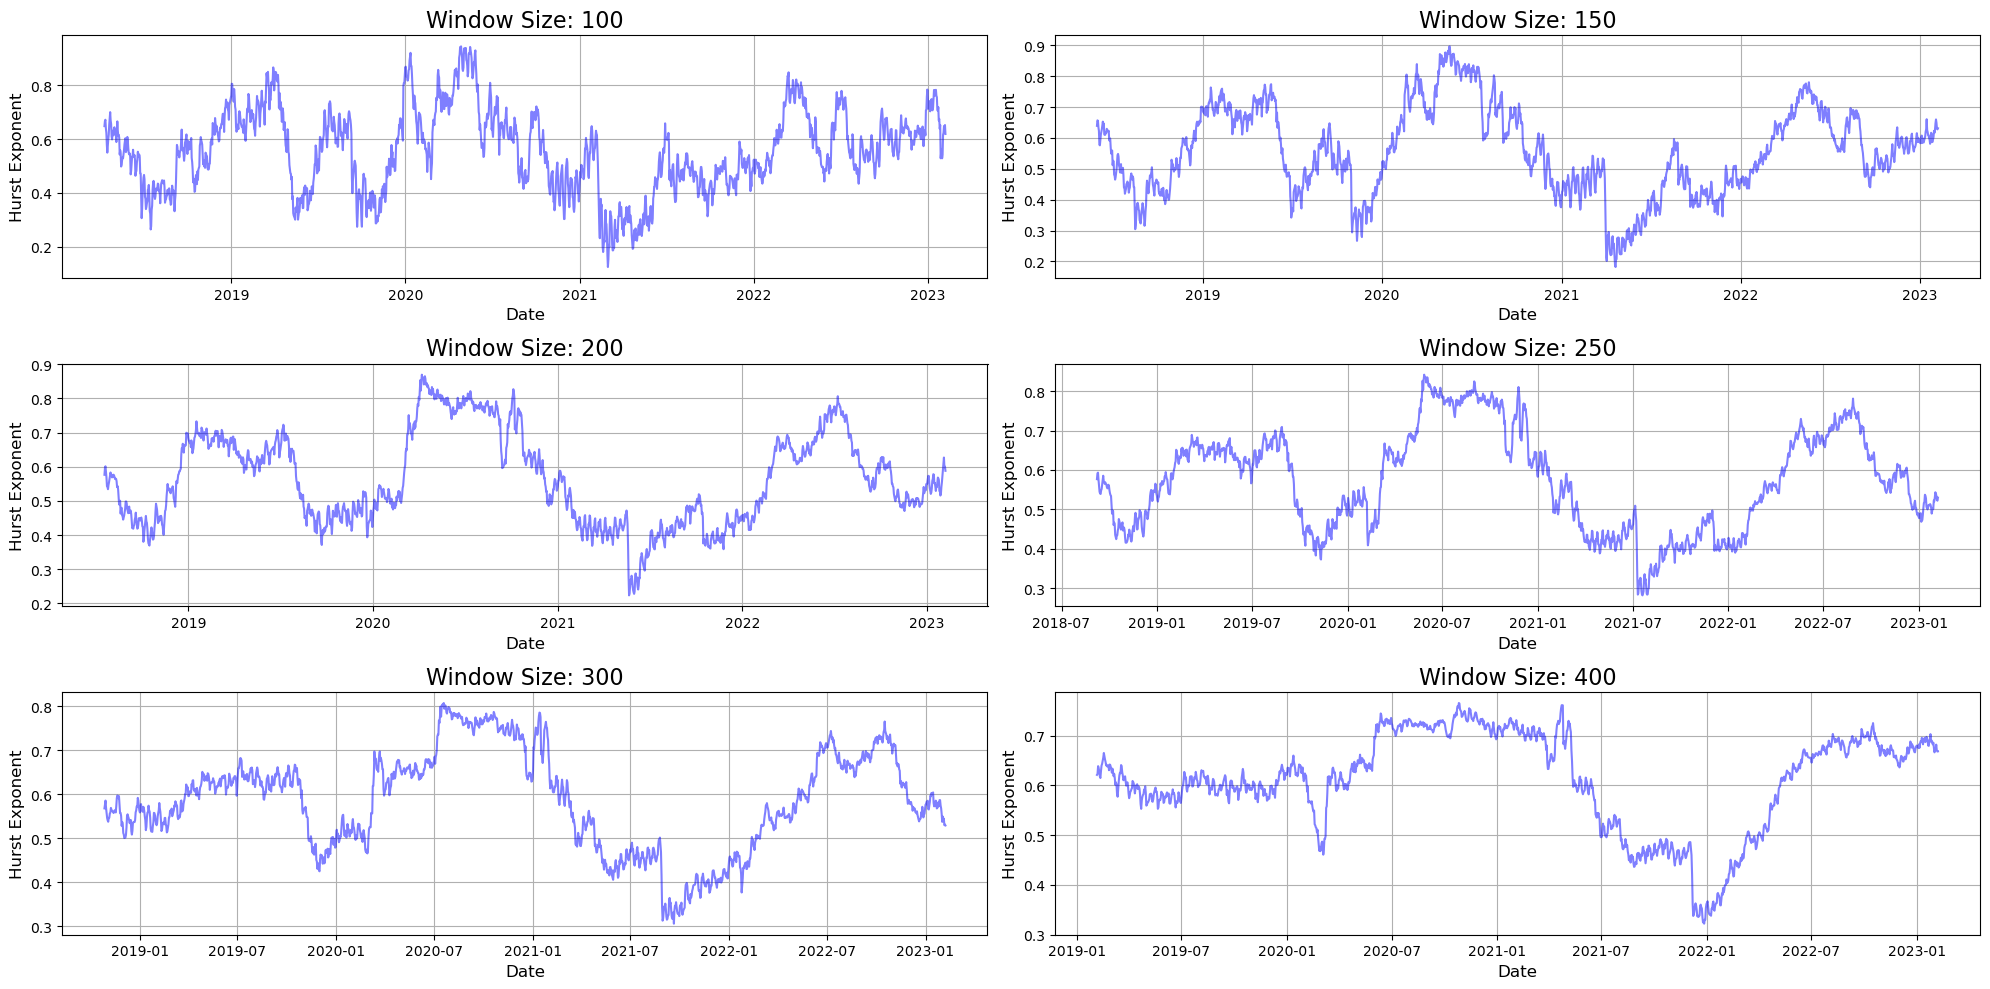

In [12]:
var_names = ['hurst_'+str(x) for x in hurst_windows]

# Plot hurst exponents
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.plot(df[var_names[0]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[0]), fontsize=16)
plt.grid()

plt.subplot(3,2,2)
plt.plot(df[var_names[1]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[1]), fontsize=16)
plt.grid()

plt.subplot(3,2,3)
plt.plot(df[var_names[2]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[2]), fontsize=16)
plt.grid()

plt.subplot(3,2,4)
plt.plot(df[var_names[3]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[3]), fontsize=16)
plt.grid()

plt.subplot(3,2,5)
plt.plot(df[var_names[4]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[4]), fontsize=16)
plt.grid()

plt.subplot(3,2,6)
plt.plot(df[var_names[5]].dropna(), 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Hurst Exponent", fontsize=12)
plt.title("Window Size: {}".format(hurst_windows[5]), fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('Hurst Exponent for different window size for ' + str(index) +'.png')
plt.show()
plt.close()

__Comments:__ <span style="color:Blue"> Window size 100 gives a volatile Hurst, but the plot for Hurst with window sizes 200, 300 and 400 is very similar. With higher window sizes the trend smoothens

## <span style="color:DarkOliveGreen">Save the Data

In [13]:
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")
df.to_csv(index +"_hurst"+".csv", index=True)

In [14]:
df

,IG_BO,SPX,VIX,UST_3M,UST_6M,UST_1Y,UST_2Y,UST_3Y,UST_5Y,UST_7Y,UST_10Y,UST_20Y,UST_30Y,IG_MID,hurst_100,hurst_150,hurst_200,hurst_250,hurst_300,hurst_400
Date,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.574,2673.61,11.04,1.39,1.53,1.76,1.89,1.98,2.20,2.33,2.40,2.58,2.74,49.020,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.400,2695.81,9.77,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81,48.455,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.444,2713.06,9.15,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78,47.095,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,0.467,2723.99,9.22,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79,45.877,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,0.475,2743.15,9.22,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81,45.518,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03,0.852,4136.48,18.33,4.70,4.82,4.79,4.30,3.96,3.67,3.61,3.53,3.77,3.63,69.044,0.624414,0.659904,0.607928,0.540319,0.541334,0.671989
2023-02-04,0.852,4136.48,18.33,4.70,4.82,4.79,4.30,3.96,3.67,3.61,3.53,3.77,3.63,69.044,0.648676,0.648888,0.626963,0.534674,0.544268,0.681936
2023-02-05,0.852,4136.48,18.33,4.70,4.82,4.79,4.30,3.96,3.67,3.61,3.53,3.77,3.63,69.044,0.624507,0.629557,0.598051,0.524357,0.529388,0.670770


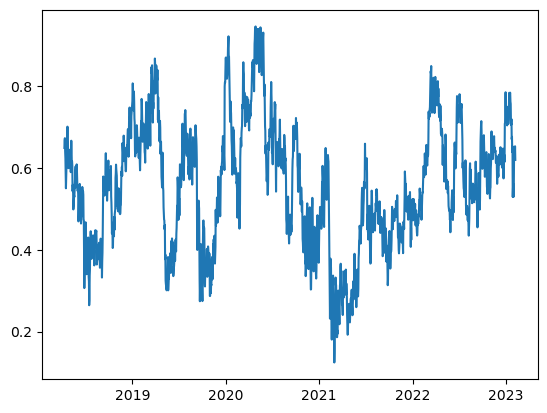

In [15]:
plt.plot(df['hurst_100'])